In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv(r'C:\Users\tabish\Downloads\train.csv')

In [3]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [4]:
round(df.isnull().sum() / len(df.index) * 100, 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [5]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [6]:
df['Alley'] = df['Alley'].fillna('No Alley')
df['Alley'].value_counts()

No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [7]:
df['Fence'] = df['Fence'].fillna('No Fence')
df['Fence'].value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [8]:
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['PoolQC'].value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [9]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [10]:
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['GarageQual'].value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64

In [11]:
df['GarageCond'] = df['GarageCond'].fillna('No Garage')
df['GarageCond'].value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [12]:
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [13]:
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [14]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['FireplaceQu'].value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [15]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtFinType2'].value_counts()

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [16]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType1'].value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [17]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Garage')
df['BsmtExposure'].value_counts()

No           953
Av           221
Gd           134
Mn           114
No Garage     38
Name: BsmtExposure, dtype: int64

In [18]:
df['BsmtCond'] = df['BsmtCond'].fillna('No Garage')
df['BsmtCond'].value_counts()

TA           1311
Gd             65
Fa             45
No Garage      37
Po              2
Name: BsmtCond, dtype: int64

In [19]:
df['BsmtQual'] = df['BsmtQual'].fillna('No Garage')
df['BsmtQual'].value_counts()

TA           649
Gd           618
Ex           121
No Garage     37
Fa            35
Name: BsmtQual, dtype: int64

In [20]:
# Again finding Null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
                ... 
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageYrBlt       81
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF  

In [21]:
# Checking the columns having most number of missing values
df.isnull().sum().reset_index().rename({0:'Number of NaN values'},axis=1).sort_values('Number of NaN values',ascending=False)

,index,Number of NaN values
3,LotFrontage,259
59,GarageYrBlt,81
25,MasVnrType,8
26,MasVnrArea,8
42,Electrical,1
53,KitchenQual,0
58,GarageType,0
57,FireplaceQu,0
56,Fireplaces,0
55,Functional,0


In [22]:
# Percentage of missing values column-wise
round(df.isnull().sum()/len(df.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu       0.00
GarageType        0.00
GarageYrBlt       5.55
GarageFinish      0.00
GarageCars        0.00
GarageArea        0.00
GarageQual 

### Imputing Missing values


### Lot Frontage


In [23]:
df['LotFrontage'].median()

69.0

In [24]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

### GarageYrBlt

In [25]:
df['GarageYrBlt'].median()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

### MasVnrType

In [26]:

df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

### MasVnrArea

In [27]:
df['MasVnrArea'].median()
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

### Electrical

In [28]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

##### Again checking the missing values after imputing values

In [29]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

###### After removing, imputing the missing rows it can be seen that no missing  values are left

### Checking for Value_count

In [30]:
# Dropping the ID column
df = df.drop('Id', axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


### MSSubClass

In [31]:
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

### MSZoning

In [32]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

### Street


In [33]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

### Alley

In [34]:
df['Alley'].value_counts()

No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

### LotShape

In [35]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

### LandContour

In [36]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

### Utilities


In [37]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### LotConfig

In [38]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

### LandSlope

In [39]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

### Neighborhood

In [40]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

### Condition1

In [41]:
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

### Condition 2

In [42]:
df['Condition2'].value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

### BldgType

In [43]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

### HouseStyle

In [44]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

### OverallQual

In [45]:
df['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

### OverallCond

In [46]:
df['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

### RoofStyle

In [47]:
df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

### RoofMatl

In [48]:
df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
ClyTile       1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

### Exterior1st

In [49]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

### Exterior2nd

In [50]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

### MasVnrType

In [51]:
df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

### ExterQual

In [52]:
df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

### ExterCond

In [53]:
df['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

### Foundation

In [54]:
df['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

### BsmtQual

In [55]:
df['BsmtQual'].value_counts()

TA           649
Gd           618
Ex           121
No Garage     37
Fa            35
Name: BsmtQual, dtype: int64

### BsmtCond

In [56]:
df['BsmtCond'].value_counts()

TA           1311
Gd             65
Fa             45
No Garage      37
Po              2
Name: BsmtCond, dtype: int64

### BsmtExposure

In [57]:
df['BsmtExposure'].value_counts()

No           953
Av           221
Gd           134
Mn           114
No Garage     38
Name: BsmtExposure, dtype: int64

### BsmtFinType1

In [58]:
df['BsmtFinType1'].value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

### BsmtFinType2

In [59]:
df['BsmtFinType2'].value_counts()

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

### Heating

In [60]:
df['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

### HeatingQC

In [61]:
df['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

### CentralAir

In [62]:
df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

### Electrical

In [63]:
df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### KitchenQual

In [64]:
df['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

### Functional

In [65]:
df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

### FireplaceQu

In [66]:
df['FireplaceQu'].value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

### GarageType

In [67]:
df['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

### GarageFinish

In [68]:
df['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

### GarageQual

In [69]:
df['GarageQual'].value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64

### GarageCond

In [70]:
df['GarageCond'].value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

### PavedDrive

In [71]:
df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

### PoolQC

In [72]:
df['PoolQC'].value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

### Fence

In [73]:
df['Fence'].value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

### MiscFeature

In [74]:
df['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

### SaleType

In [75]:
df['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

### SaleCondition

In [76]:
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

#####  Drop the  columns having only one predominant option, since it won't make any impact on the conversion rate.

In [77]:
col_to_drop = ['Alley', 'Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature']
df = df.drop(col_to_drop, axis = 1)
df.shape

(1460, 67)

# Outliers

In [78]:
df1 = df.describe(percentiles=[.25, .5, .75, .90, .95, .99])
df1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [79]:
df1.iloc[:, 10:27]

,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137
std,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841
min,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000
25%,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000
50%,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000
75%,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000
90%,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000
95%,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000
99%,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000


### LotArea

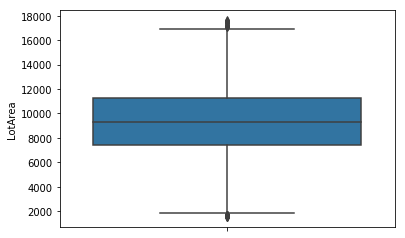

In [80]:
### #Outlier removal
Q1 = df.LotArea.quantile(0.25)
Q3 = df.LotArea.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.LotArea >= Q1 - 1.5*IQR) & ( df.LotArea <= Q3 + 1.5*IQR)]
sns.boxplot(y = df['LotArea'])

### MasVnrArea	

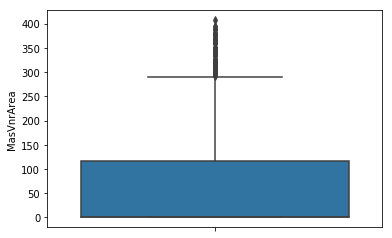

In [81]:
### #Outlier removal
Q1 = df.MasVnrArea.quantile(0.25)
Q3 = df.MasVnrArea.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.MasVnrArea >= Q1 - 1.5*IQR) & ( df.MasVnrArea <= Q3 + 1.5*IQR)]
sns.boxplot(y = df['MasVnrArea'])

### BsmtFinSF1	

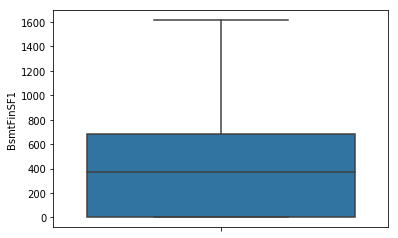

In [82]:
### #Outlier removal
Q1 = df.BsmtFinSF1.quantile(0.25)
Q3 = df.BsmtFinSF1.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.BsmtFinSF1 >= Q1 - 1.5*IQR) & ( df.BsmtFinSF1 <= Q3 + 1.5*IQR)]
sns.boxplot(y = df['BsmtFinSF1'])

### PoolArea

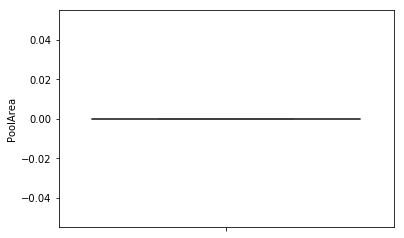

In [83]:
### #Outlier removal
Q1 = df.PoolArea.quantile(0.25)
Q3 = df.PoolArea.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.PoolArea >= Q1 - 1.5*IQR) & ( df.PoolArea <= Q3 + 1.5*IQR)]
sns.boxplot(y = df['PoolArea'])

### MiscVal

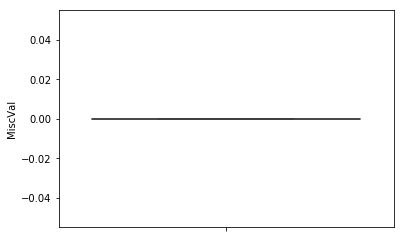

In [84]:
### #Outlier removal
Q1 = df.MiscVal.quantile(0.25)
Q3 = df.MiscVal.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.MiscVal >= Q1 - 1.5*IQR) & ( df.MiscVal <= Q3 + 1.5*IQR)]
sns.boxplot(y = df['MiscVal'])

### TotalBsmtSF

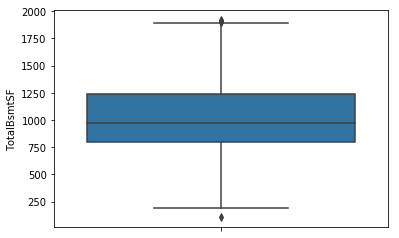

In [85]:
### #Outlier removal
Q1 = df.TotalBsmtSF.quantile(0.25)
Q3 = df.TotalBsmtSF.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.TotalBsmtSF >= Q1 - 1.5*IQR) & ( df.TotalBsmtSF <= Q3 + 1.5*IQR)]
sns.boxplot(y = df['TotalBsmtSF'])

In [86]:
df.shape

(1202, 67)

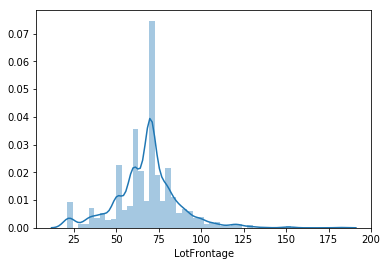

In [87]:
# wheelbase: distance between centre of front and rarewheels
sns.distplot(df['LotFrontage'])
plt.show()

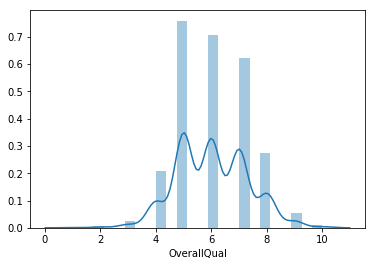

In [88]:
# wheelbase: distance between centre of front and rarewheels
sns.distplot(df['OverallQual'])
plt.show()

In [89]:
# correlation matrix
cor = df.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.414922,-0.435695,0.072280,-0.059734,0.031630,0.047601,0.026031,-0.068149,-0.053143,...,-0.025447,0.010673,-0.019958,-0.034593,-0.018592,NaN,NaN,-0.022262,-0.023045,-0.059335
LotFrontage,-0.414922,1.000000,0.587617,0.188642,-0.038270,0.121850,0.069760,0.152160,0.108576,0.024500,...,0.095433,0.088521,-0.017692,0.072728,0.042142,NaN,NaN,0.025354,0.019298,0.321694
LotArea,-0.435695,0.587617,1.000000,0.185100,-0.025732,0.076802,0.051805,0.112095,0.172792,0.054222,...,0.138360,0.104137,-0.024904,0.041017,0.082302,NaN,NaN,0.020684,-0.025771,0.387234
OverallQual,0.072280,0.188642,0.185100,1.000000,-0.120799,0.565421,0.532240,0.334481,0.120465,-0.073044,...,0.191707,0.309554,-0.141170,0.039532,0.031728,NaN,NaN,0.080609,-0.021823,0.798700
OverallCond,-0.059734,-0.038270,-0.025732,-0.120799,1.000000,-0.381957,0.056104,-0.125248,-0.033321,0.047894,...,-0.018967,-0.040080,0.093423,0.014751,0.055697,NaN,NaN,-0.002099,0.045253,-0.099782
YearBuilt,0.031630,0.121850,0.076802,0.565421,-0.381957,1.000000,0.591669,0.308147,0.226616,-0.038204,...,0.221502,0.193564,-0.426382,0.019497,-0.041002,NaN,NaN,0.013520,-0.019621,0.580887
YearRemodAdd,0.047601,0.069760,0.051805,0.532240,0.056104,0.591669,1.000000,0.129396,0.078457,-0.057168,...,0.193141,0.237406,-0.208118,0.021997,-0.033501,NaN,NaN,0.024529,0.040365,0.554828
MasVnrArea,0.026031,0.152160,0.112095,0.334481,-0.125248,0.308147,0.129396,1.000000,0.197193,-0.085258,...,0.125055,0.098823,-0.121705,0.046867,0.038254,NaN,NaN,0.037001,0.010706,0.375954
BsmtFinSF1,-0.068149,0.108576,0.172792,0.120465,-0.033321,0.226616,0.078457,0.197193,1.000000,-0.064817,...,0.175533,0.032706,-0.137709,0.023034,0.075879,NaN,NaN,0.016890,0.024372,0.323235
BsmtFinSF2,-0.053143,0.024500,0.054222,-0.073044,0.047894,-0.038204,-0.057168,-0.085258,-0.064817,1.000000,...,0.109865,-0.034326,0.022889,-0.029138,0.038917,NaN,NaN,-0.018865,0.048206,-0.023906


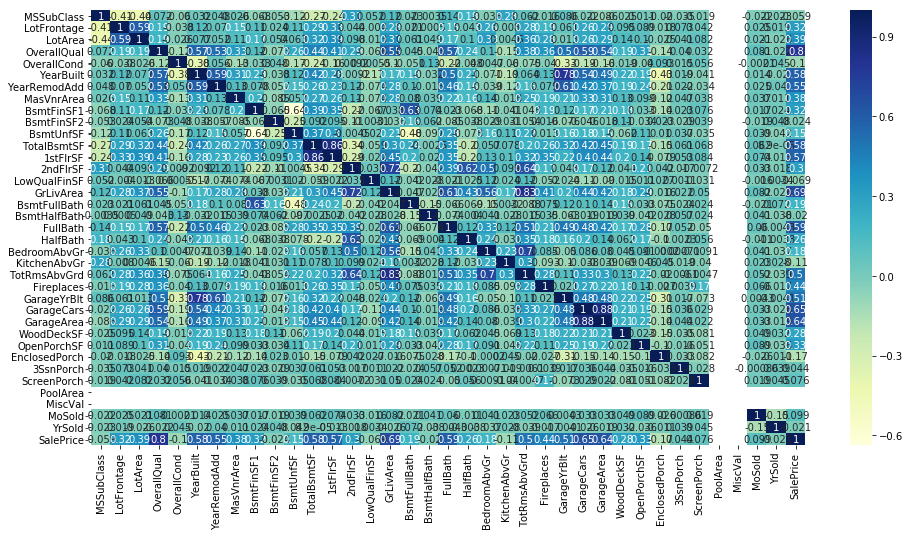

In [90]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

# Data Preparation

### Dummy Creation

In [91]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MSZoning'
ml = pd.get_dummies(df['MSZoning'], prefix = 'MSZoning')

#Adding the results to the master dataframe
df = pd.concat([df, ml], axis = 1)

ml = pd.get_dummies(df['LotShape'], prefix = 'LotShape')

# Adding the results to the masterframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variables for the variable Land Contour
ml = pd.get_dummies(df['LandContour'], prefix = 'LandContour')
# Adding the result to the masterframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variables for Lot Config
ml = pd.get_dummies(df['LotConfig'], prefix = 'LotConfig')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis  = 1)

# Creating the dummy variable for Neighborhood
ml = pd.get_dummies(df['Neighborhood'], prefix = 'Neighborhood')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variables for Condition1
ml = pd.get_dummies(df['Condition1'], prefix = 'Condition1')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variables for BldgType
ml = pd.get_dummies(df['BldgType'], prefix = 'BldgType')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variables for HouseStyle
ml = pd.get_dummies(df['HouseStyle'], prefix = 'HouseStyle')
# Adding the variable to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating Dummy Variable for RoofStyle
ml = pd.get_dummies(df['RoofStyle'], prefix = 'RoofStyle')
# Adding the varibles to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for Exterior1st
ml = pd.get_dummies(df['Exterior1st'], prefix = 'Exterior1st')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for Exterior2nd
ml = pd.get_dummies(df['Exterior2nd'], prefix = 'Exterior2nd')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for MasVnrArea 
ml = pd.get_dummies(df['MasVnrType'], prefix = 'MasVnrType')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for ExterQual 
ml = pd.get_dummies(df['ExterQual'], prefix = 'ExterQual')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for ExterCond 
ml = pd.get_dummies(df['ExterCond'], prefix = 'ExterCond')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for Foundation 
ml = pd.get_dummies(df['Foundation'], prefix = 'Foundation')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)


# Creating dummy variable for BsmtQual 
ml = pd.get_dummies(df['BsmtQual'], prefix = 'BsmtQual')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)


# Creating dummy variable for BsmtCond 
ml = pd.get_dummies(df['BsmtCond'], prefix = 'BsmtCond')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for BsmtExposure 
ml = pd.get_dummies(df['BsmtExposure'], prefix = 'BsmtExposure')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)


# Creating dummy variable for BsmtFinType1 
ml = pd.get_dummies(df['BsmtFinType1'], prefix = 'BsmtFinType1')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)


# Creating dummy variable for BsmtFinType2 
ml = pd.get_dummies(df['BsmtFinType2'], prefix = 'BsmtFinType2')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)


# Creating dummy variable for HeatingQC 
ml = pd.get_dummies(df['HeatingQC'], prefix = 'HeatingQC')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)


# Creating dummy variable for KitchenQual 
ml = pd.get_dummies(df['KitchenQual'], prefix = 'KitchenQual')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)


# Creating dummy variable for Functional 
ml = pd.get_dummies(df['Functional'], prefix = 'Functional')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for FireplaceQu 
ml = pd.get_dummies(df['FireplaceQu'], prefix = 'FireplaceQu')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for GarageType 
ml = pd.get_dummies(df['GarageType'], prefix = 'GarageType')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)


# Creating dummy variable for GarageFinish 
ml = pd.get_dummies(df['GarageFinish'], prefix = 'GarageFinish')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for GarageQual 
ml = pd.get_dummies(df['GarageQual'], prefix = 'GarageQual')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for Fence 
ml = pd.get_dummies(df['SaleType'], prefix = 'Fence')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for SaleType 
ml = pd.get_dummies(df['SaleType'], prefix = 'SaleType')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)


# Creating dummy variable for SaleCondition 
ml = pd.get_dummies(df['SaleCondition'], prefix = 'SaleCondition')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

# Creating dummy variable for SaleCondition 
ml = pd.get_dummies(df['Fence'], prefix = 'Fence')
# Adding the variables to the dataframe
df = pd.concat([df, ml], axis = 1)

In [92]:
df.shape

(1202, 276)

In [93]:
df = df.drop(['SaleCondition', 'SaleType', 'GarageQual', 'GarageFinish', 'GarageType', 'FireplaceQu', 'Functional', 'KitchenQual', 'HeatingQC', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'Foundation', 'ExterCond', 'ExterQual', 'MasVnrType', 'Exterior2nd', 'Exterior1st', 'RoofStyle', 'HouseStyle', 'BldgType', 'Condition1', 'Neighborhood', 'LotConfig', 'LandContour', 'LotShape', 'Fence', 'MSZoning'], axis = 1)

## Target Column

### Sales Price

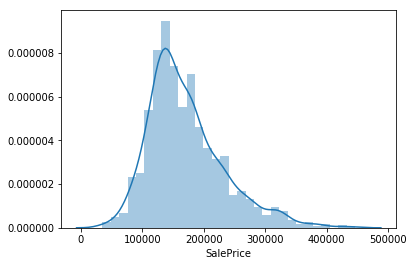

In [94]:
#Let's visualize the distribution of sale price
sns.distplot(df['SalePrice'])

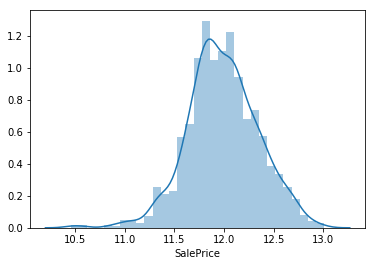

In [95]:
# Converting into logarithmic scale to distribute it normally
df['SalePrice'] = df['SalePrice'].apply(np.log)
sns.distplot(df['SalePrice'])

##### Target Column is normally distributed 

## Derived Features


## Age

In [96]:
#Getting the age of the houses
df['CurrentYear'] = datetime.datetime.now().year
df['Age'] = df['CurrentYear'] - df['YearBuilt']


## Garage Age

In [97]:
df['Garage Age'] = df['CurrentYear'] - df['GarageYrBlt']

## Age Sold

In [98]:
df['AgeSold'] = df['CurrentYear'] - df['YrSold']

## Age Remod Add

In [99]:
df['AgeRemodAdd'] = df['CurrentYear'] - df['YearRemodAdd']

In [100]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,CurrentYear,Age,Garage Age,AgeSold,AgeRemodAdd
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,2020,17,17.0,12,17
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,2020,44,44.0,13,44
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,2020,19,19.0,12,18
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,2020,105,22.0,14,50
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,2020,20,20.0,12,20


In [101]:
# Dropping original columns and Current year
df.drop(['CurrentYear', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)
df.shape

(1202, 246)

# Model Building

In [102]:
# model coefficients
y = df.loc[:, 'SalePrice']
X = df.loc[:, df.columns != 'SalePrice']

# scale
scaler = StandardScaler()
scaler.fit(X)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

G:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


## Ridge Regression

In [103]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [104]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009008,0.001791,0.001600,0.000490,0.0001,{'alpha': 0.0001},-0.084485,-0.084682,-0.079251,-0.082362,...,-0.083502,0.002533,26,-0.059042,-0.060100,-0.059888,-0.059051,-0.058412,-0.059298,0.000617
1,0.009007,0.001415,0.001401,0.000490,0.001,{'alpha': 0.001},-0.084472,-0.084672,-0.079243,-0.082354,...,-0.083493,0.002533,25,-0.059042,-0.060101,-0.059888,-0.059051,-0.058412,-0.059299,0.000617
2,0.008808,0.001167,0.001800,0.000401,0.01,{'alpha': 0.01},-0.084342,-0.084584,-0.079174,-0.082267,...,-0.083411,0.002537,24,-0.059040,-0.060108,-0.059893,-0.059055,-0.058414,-0.059302,0.000619
3,0.009406,0.001021,0.001800,0.000400,0.05,{'alpha': 0.05},-0.083802,-0.084218,-0.078880,-0.081901,...,-0.083068,0.002560,23,-0.059041,-0.060138,-0.059923,-0.059073,-0.058422,-0.059319,0.000629
4,0.006605,0.000490,0.001200,0.000401,0.1,{'alpha': 0.1},-0.083219,-0.083798,-0.078545,-0.081488,...,-0.082683,0.002592,22,-0.059070,-0.060169,-0.059962,-0.059098,-0.058439,-0.059348,0.000635


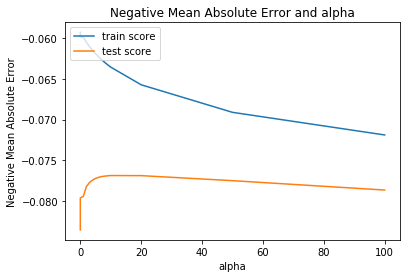

In [105]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [106]:
print(model_cv.best_params_)

{'alpha': 10.0}


In [107]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.75582790e-04,  7.91318544e-05,  8.15480793e-06,  4.52548542e-02,
        4.90825798e-02, -2.82345596e-05,  6.68779425e-05,  7.18626888e-05,
       -7.42682555e-06,  1.31313803e-04,  7.52101864e-05,  7.85246424e-05,
        4.71404153e-05,  2.00875247e-04,  2.09097845e-02, -1.32225028e-03,
        1.63154669e-02,  2.23882894e-02, -8.62631512e-03, -2.55412122e-02,
        4.86140682e-03,  3.83885153e-03,  1.65862436e-02,  6.00921959e-05,
        7.66498040e-05,  5.67286697e-06,  1.79326235e-04,  2.05184469e-04,
        2.55800121e-04,  0.00000000e+00,  0.00000000e+00,  8.82336880e-05,
       -1.24004197e-01,  4.34054486e-02,  2.45356728e-02,  4.39831316e-02,
        1.20799443e-02, -4.64441844e-03,  1.65688093e-02, -1.47625921e-02,
        2.83820116e-03, -6.13608462e-03,  2.33708876e-02, -1.08076203e-02,
       -6.42718269e-03,  6.07889944e-03,  1.54940816e-02, -2.19613277e-02,
       -1.65557803e-03,  2.04392467e-03, -4.91813558e-03,  4.59434617e-03,
       -9.15446288e-03,  

# Lasso Regression

In [108]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [109]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.067246,0.020306,0.001201,0.000401,0.0001,{'alpha': 0.0001},-0.077307,-0.079059,-0.074587,-0.077221,...,-0.078197,0.002714,2,-0.059769,-0.061198,-0.061143,-0.059952,-0.059471,-0.060306,0.000722
1,0.022015,0.005177,0.001201,0.000400,0.001,{'alpha': 0.001},-0.076720,-0.077433,-0.075482,-0.077482,...,-0.077351,0.001353,1,-0.068027,-0.070002,-0.068829,-0.068326,-0.068238,-0.068684,0.000709
2,0.011411,0.001750,0.001202,0.000401,0.01,{'alpha': 0.01},-0.086566,-0.088450,-0.087504,-0.081562,...,-0.086162,0.002394,3,-0.083647,-0.084214,-0.083621,-0.084595,-0.084096,-0.084035,0.000366
3,0.048233,0.015103,0.001401,0.000491,0.05,{'alpha': 0.05},-0.108407,-0.096238,-0.104235,-0.093509,...,-0.100186,0.005426,4,-0.098208,-0.098318,-0.096994,-0.097573,-0.096893,-0.097597,0.000592
4,0.029215,0.004707,0.001401,0.000490,0.1,{'alpha': 0.1},-0.110902,-0.101947,-0.108513,-0.097866,...,-0.104567,0.004660,5,-0.100494,-0.103664,-0.102006,-0.104027,-0.101622,-0.102362,0.001314


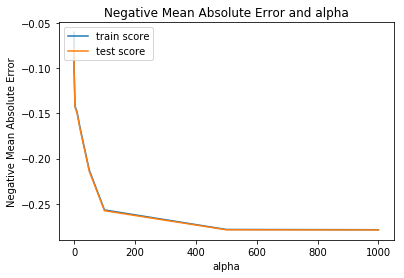

In [110]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [111]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [112]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
lasso.coef_

array([-2.18242033e-04,  8.51868879e-05,  7.74254860e-06,  5.39769528e-02,
        4.87684473e-02, -1.76448933e-05,  1.40909877e-04,  9.66892308e-05,
        5.38118010e-05,  6.78107015e-05,  2.30922789e-04,  2.48280440e-04,
        1.96161062e-04,  5.28504125e-05,  1.46376877e-02, -0.00000000e+00,
        0.00000000e+00,  7.42772995e-03, -9.89342002e-03, -9.45644801e-03,
        8.67192383e-04,  5.03119162e-03,  1.09145919e-02,  1.00457384e-04,
        8.85283727e-05,  2.36522789e-05,  1.88751235e-04,  1.97911879e-04,
        2.47745764e-04,  0.00000000e+00,  0.00000000e+00,  5.88064038e-04,
       -2.13551151e-01,  0.00000000e+00,  0.00000000e+00,  9.28055983e-03,
       -3.51728034e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.55090713e-03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [114]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)
#y_pred_ridge_test = ridge.predict(X_test)

In [115]:
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score for ridge: 0.9315442303889443
r2_score for lasso: 0.9208723690178839


In [116]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

In [117]:
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score for ridge: 0.91
r2_score for lasso: 0.9


In [118]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 10.704),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.054),
 ('OverallCond', 0.049),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.015),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.007),
 ('BedroomAbvGr', -0.01),
 ('KitchenAbvGr', -0.009),
 ('TotRmsAbvGrd', 0.001),
 ('Fireplaces', 0.005),
 ('GarageCars', 0.011),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.001),
 ('MSZoning_C (all)', -0.214),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.009),
 ('MSZoning_RM', -0.035),
 ('LotShape_IR1', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', 0.0),
 ('LandContour_Bnk', 0.0)

### Converting Value_Coeff into Dataframe

In [119]:
df_1 = pd.DataFrame(var_coeff)
## renaming the columns
df_1 = df_1.rename(columns = {0 : 'Y', 1 : 'X'})
# Sorting the data according to coefficients value
df_1.sort_values('X', ascending = False)


,Y,X
0,constant,10.704
57,Neighborhood_Crawfor,0.104
54,Neighborhood_BrkSide,0.068
4,OverallQual,0.054
72,Neighborhood_Somerst,0.050
5,OverallCond,0.049
180,KitchenQual_Ex,0.047
147,Foundation_PConc,0.035
78,Condition1_Norm,0.032
159,BsmtExposure_Gd,0.025


# Conclusion

#### 1. Optimum value for lambda in ridge regression is 10
#### 2. Optimum value for lambda in lasso regression is 0.001
#### 3. So, the company can purchase houses below the market value by highlighting the negative parameters.
#### 4. r2_score in train dataset: r2_score for ridge: 0.93, r2_score for lasso: 0.92
#### 5. r2_score in test dataset: r2_score for ridge: 0.91, r2_score for lasso: 0.90
#### 6. Top 5 Variables are:
####      Neighborhood_Crawfor
####      Neighborhood_BrkSide
####      OverallQual
####      Neighborhood_Somerst
####      OverallCond